In [ ]:
# @ Librerias

import re, gdown, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import norm
from IPython.display import HTML, display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# @title Cargar datos

SHARE_URL = "https://drive.google.com/file/d/1cTjcpzzBVBl73dzWgL0TIuwicOAEdMf2/view?usp=sharing"


file_id = re.search(r'/d/([^/]+)', SHARE_URL).group(1)
gdown.download(f"https://drive.google.com/uc?id={file_id}", "caracteristicas de vinos.csv", quiet=False)

df = pd.read_csv("caracteristicas de vinos.csv")


# caracteristicas

df.info()
df.head()

Downloading...
From: https://drive.google.com/uc?id=1cTjcpzzBVBl73dzWgL0TIuwicOAEdMf2
To: /content/caracteristicas de vinos.csv
100%|██████████| 903k/903k [00:00<00:00, 84.7MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# eliminamos la columna cust_id
df_wo_id = df.drop('CUST_ID', axis=1)


In [ ]:
#recorramos los datos

listItem = []
for col in df_wo_id.columns :
    listItem.append([col, df_wo_id[col].dtype, df_wo_id[col].isna().sum(), round((df_wo_id[col].isna().sum()/len(df_wo_id[col])) * 100,2),
                    df_wo_id[col].nunique(), list(df_wo_id[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,missing value,nullPct,unique,uniqueSample
0,BALANCE,float64,0,0.00,8871,"[394.269079, 955.184754]"
1,BALANCE_FREQUENCY,float64,0,0.00,43,"[0.125, 0.333333]"
2,PURCHASES,float64,0,0.00,6203,"[1310.31, 174.84]"
3,ONEOFF_PURCHASES,float64,0,0.00,4014,"[2094.44, 1600.0]"
4,INSTALLMENTS_PURCHASES,float64,0,0.00,4452,"[133.14, 342.76]"
5,CASH_ADVANCE,float64,0,0.00,4323,"[4863.883228, 1845.164653]"
6,PURCHASES_FREQUENCY,float64,0,0.00,47,"[0.090909, 0.818182]"
7,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.00,47,"[0.166667, 0.375]"
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.00,47,"[0.9, 0.777778]"
9,CASH_ADVANCE_FREQUENCY,float64,0,0.00,54,"[0.142857, 0.090909]"


In [ ]:
# Eliminar filas que tengan NaN en CREDIT_LIMIT o MINIMUM_PAYMENTS
df_limpio = df_wo_id.dropna(subset=["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]).copy()

# (Opcional) chequeo rápido
print(df_limpio[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].isna().sum())


CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64


In [ ]:
#recorramos los datos nuevamente

listItem = []
for col in df_limpio.columns :
    listItem.append([col, df_wo_id[col].dtype, df_wo_id[col].isna().sum(), round((df_wo_id[col].isna().sum()/len(df_wo_id[col])) * 100,2),
                    df_wo_id[col].nunique(), list(df_wo_id[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,missing value,nullPct,unique,uniqueSample
0,BALANCE,float64,0,0.0,8631,"[991.11995, 43.354029]"
1,BALANCE_FREQUENCY,float64,0,0.0,42,"[0.5, 0.8]"
2,PURCHASES,float64,0,0.0,6015,"[1337.35, 436.0]"
3,ONEOFF_PURCHASES,float64,0,0.0,3922,"[1025.19, 165.29]"
4,INSTALLMENTS_PURCHASES,float64,0,0.0,4341,"[288.8, 1058.58]"
5,CASH_ADVANCE,float64,0,0.0,4206,"[6616.555691, 1105.738809]"
6,PURCHASES_FREQUENCY,float64,0,0.0,47,"[0.416667, 0.428571]"
7,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.0,47,"[0.375, 0.222222]"
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.0,47,"[0.428571, 0.777778]"
9,CASH_ADVANCE_FREQUENCY,float64,0,0.0,54,"[0.111111, 0.75]"


In [ ]:
#normalizamos los valores delas caracteristicas

df_norm = (df_limpio - df_limpio.min()) / (df_limpio.max() - df_limpio.min())
df_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.00000,0.002793,0.015025,0.001155,0.000569,0.000000,0.0
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006418,0.000640,0.500000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001601,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001035,0.000729,0.250000,0.0


In [ ]:
df_norm.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.084084,0.895035,0.020910,0.014840,0.018704,0.021091,0.496000,0.205909,0.368820,0.091736,0.026942,0.041992,0.149319,0.035181,0.011312,0.159304,0.922398
std,0.110043,0.207697,0.044191,0.041321,0.040766,0.045006,0.401273,0.300054,0.398093,0.134528,0.056199,0.070337,0.122178,0.057368,0.031052,0.296271,0.218497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007777,0.909091,0.000884,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.008251,0.002214,0.000000,1.000000
50%,0.048146,1.000000,0.007655,0.001104,0.004213,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.017677,0.004089,0.000000,1.000000
75%,0.110549,1.000000,0.023368,0.014698,0.021518,0.024023,0.916667,0.333333,0.750000,0.166667,0.032520,0.050279,0.215359,0.038467,0.010804,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


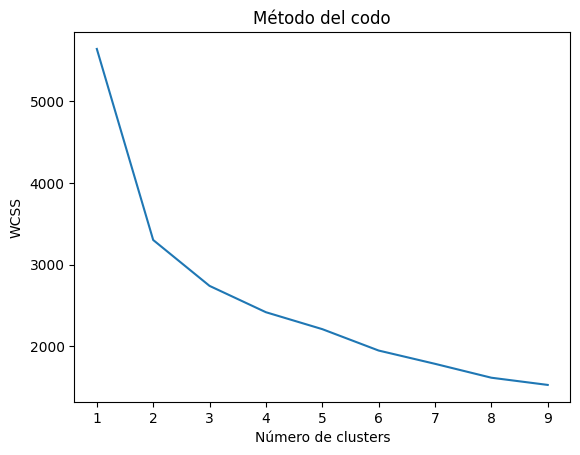

In [ ]:
# @title Busqueda de la cantidad optima de clusteres

#Calculamos que tan similares son los individuos dentro de los clusteres


wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(df_norm)      # Ajusto K-means a la base de datos
    wcss.append(kmeans.inertia_)

#Grafico de los resultados de WCSS

plt.plot(range(1, 10), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")   # WCSS: Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

In [ ]:
# @title Aplicando el metodo de k-means a la base de datos

clustering = KMeans(
    n_clusters=2,
    init='k-means++',
    max_iter=300,
    random_state=0
)

clustering.fit(df_norm)

KMeans(n_clusters=2, random_state=0)

In [ ]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(df_norm, df_limpio["KMeans_Clusters"])
print("Silhouette score:", sil)


Silhouette score: 0.37634025248151914


In [ ]:
# @title Agregando la clasificacion al archivo original

df_limpio['KMeans_Clusters'] = clustering.labels_   # Los resultados del clustering se guardan en labels_ dentro del modelo
df_limpio.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans_Clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [ ]:
# @title Visualizando los clusteres que se formaron

#aplicaremos el ANALISIS DE COMPONENTES PRINCIPALES (PCA) para darnos una idea de como se formaron los clusters


pca = PCA(n_components=2)
pca_cc = pca.fit_transform(df_norm)
pca_cc_df = pd.DataFrame(data = pca_cc, columns = ['Componente_1', 'Componente_2'])
pca_nombres_cc = pd.concat([pca_cc_df, df_limpio[['KMeans_Clusters']]], axis=1)

pca_nombres_cc


,Componente_1,Componente_2,KMeans_Clusters
0,-0.492046,-0.106987,1.0
1,-0.620691,-0.030137,1.0
2,0.291581,0.922922,2.0
3,-0.567819,0.023027,NaN
4,0.188140,-0.249456,1.0
...,...,...,...
8943,NaN,NaN,1.0
8945,NaN,NaN,0.0
8947,NaN,NaN,0.0
8948,NaN,NaN,1.0


In [ ]:
# 1) Eliminar filas con NaN en PCA o en los clusters
pca_nombres_cc = pca_nombres_cc.dropna(subset=["Componente_1", "Componente_2", "KMeans_Clusters"])

# 2) Asegurar que los clusters son enteros
pca_nombres_cc["KMeans_Clusters"] = pca_nombres_cc["KMeans_Clusters"].astype(int)

/tmp/ipython-input-2609840651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_nombres_cc["KMeans_Clusters"] = pca_nombres_cc["KMeans_Clusters"].astype(int)


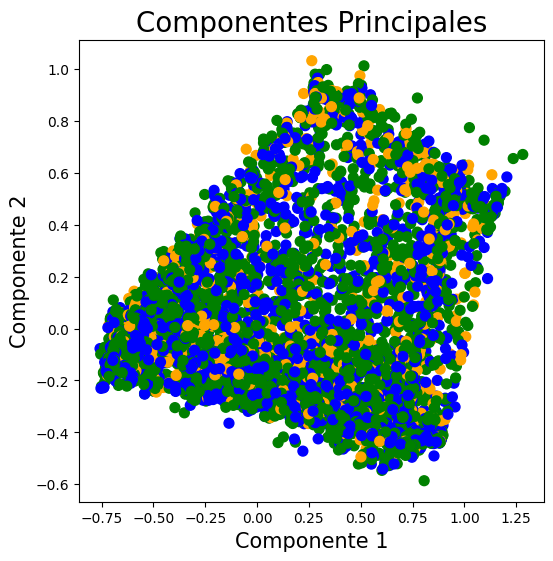

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_cc.Componente_1,
           y = pca_nombres_cc.Componente_2,
           c = color_theme[pca_nombres_cc.KMeans_Clusters],
           s = 50)

plt.show()